In [15]:
import os
import numpy as np
import scipy.io

# Path to the .mat file (update the path if needed)
file_path = "/kaggle/input/avenue/avenue/avenue.mat"

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at {file_path}")

# Load the .mat file
data = scipy.io.loadmat(file_path)
print("Keys in the .mat file:", data.keys())

# Set the key that stores abnormal frames information; update if necessary
abnormal_key = "gt"  

if abnormal_key not in data:
    raise KeyError(f"Key '{abnormal_key}' not found in .mat file")

# Extract and squeeze the abnormal frames data
abnormal_frames_data = data[abnormal_key]
abnormal_frames_data = abnormal_frames_data.squeeze()
print("Squeezed abnormal frames data shape:", abnormal_frames_data.shape)

# Convert the data into a list of range objects.
# Each item is expected to have at least two numbers: start and end.
abnormal_frame_ranges = []
for item in abnormal_frames_data:
    # Flatten each item in case it has extra dimensions
    item = np.array(item).flatten()
    if len(item) >= 2:
        start, end = int(item[0]), int(item[1])
        abnormal_frame_ranges.append(range(start, end + 1))
    else:
        print("Unexpected format in item:", item)

# Print the ranges in the target format
print("\n# Abnormal frame ranges for each test video (as provided)")
print("abnormal_frame_ranges = [")
for r in abnormal_frame_ranges:
    print(f"    range({r.start}, {r.stop}),")
print("]")


Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'gt'])
Squeezed abnormal frames data shape: (21,)

# Abnormal frame ranges for each test video (as provided)
abnormal_frame_ranges = [
    range(78, 393),
    range(273, 725),
    range(295, 583),
    range(380, 650),
    range(469, 787),
    range(345, 857),
    range(423, 564),
    range(21, 31),
    range(136, 497),
    range(571, 638),
    range(21, 309),
    range(539, 646),
    range(259, 459),
    range(399, 486),
    range(498, 588),
    range(632, 731),
    range(21, 100),
    range(21, 286),
    range(109, 241),
    range(65, 169),
    range(14, 67),
]


# Without Augmentations

Shape of avenue_xTrain: (15328, 200, 200, 1)
Shape of avenue_xTest: (15324, 200, 200, 1)
Processing folder: 01
Abnormal frame range: range(78, 393)
Processing folder: 02
Abnormal frame range: range(273, 725)
Processing folder: 03
Abnormal frame range: range(295, 583)
Processing folder: 04
Abnormal frame range: range(380, 650)
Processing folder: 05
Abnormal frame range: range(469, 787)
Processing folder: 06
Abnormal frame range: range(345, 857)
Processing folder: 07
Abnormal frame range: range(423, 564)
Processing folder: 08
Abnormal frame range: range(21, 31)
Processing folder: 09
Abnormal frame range: range(136, 497)
Processing folder: 10
Abnormal frame range: range(571, 638)
Processing folder: 11
Abnormal frame range: range(21, 309)
Processing folder: 12
Abnormal frame range: range(539, 646)
Processing folder: 13
Abnormal frame range: range(259, 459)
Processing folder: 14
Abnormal frame range: range(399, 486)
Processing folder: 15
Abnormal frame range: range(498, 588)
Processing fold

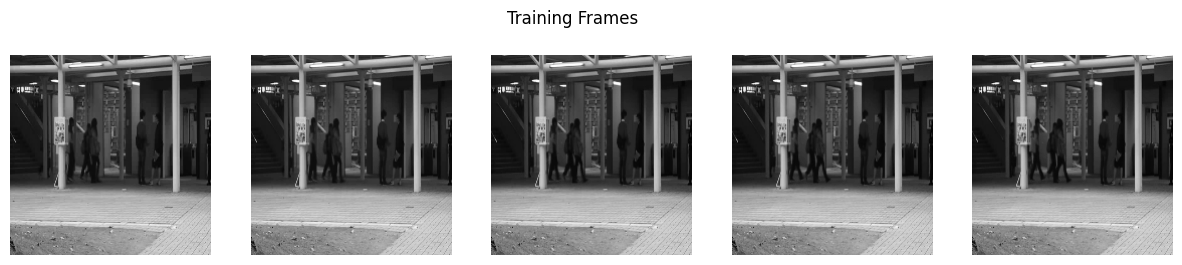

Displaying some testing frames:


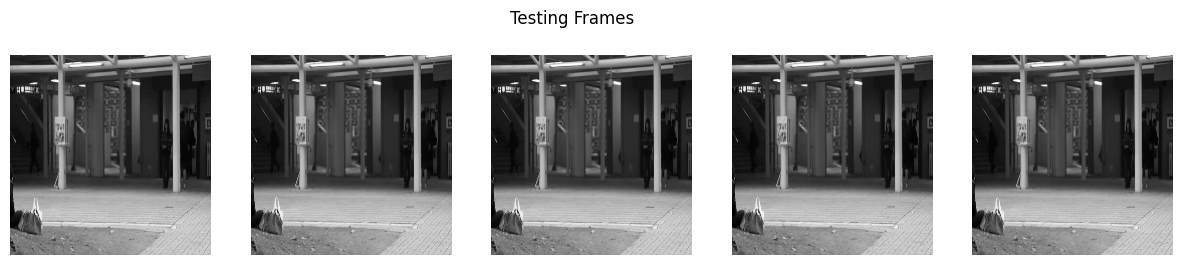

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 200, 200, 3)    │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)             

 Total params: 58,637,344 (223.68 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 408ms/step
Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 570ms/step - loss: 0.0337 - val_loss: 0.0178
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 379ms/step - loss: 0.0056 - val_loss: 0.0121
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 379ms/step - loss: 0.0039 - val_loss: 0.0103
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - loss: 0.0034 - val_loss: 0.0092
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - loss: 0.0028 - val_loss: 0.0079
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - loss: 0.0025 - val_loss: 0.0076
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 379ms/step - loss: 0.0023 - val_loss: 0.0066
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - loss: 0.0021 - val_loss: 0.0060
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - loss: 0.0020 - val_loss: 0.0062
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 379ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - loss: 0

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# Dataset Setup
# ------------------------------------------------------------------------------
DATASET_PATH = '/kaggle/input/avenue/avenue'
input_shape = (200, 200, 1)

# ------------------------------------------------------------------------------
# 1. Data Loading Functions
# ------------------------------------------------------------------------------
def load_train_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    Each subfolder (e.g. '01', '02', ...) is assumed to hold frames for one video.
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

def load_test_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

# ------------------------------------------------------------------------------
# 2. Abnormal Frame Ranges (Manually Provided)
# ------------------------------------------------------------------------------
abnormal_frame_ranges = [
    range(78, 393),
    range(273, 725),
    range(295, 583),
    range(380, 650),
    range(469, 787),
    range(345, 857),
    range(423, 564),
    range(21, 31),
    range(136, 497),
    range(571, 638),
    range(21, 309),
    range(539, 646),
    range(259, 459),
    range(399, 486),
    range(498, 588),
    range(632, 731),
    range(21, 100),
    range(21, 286),
    range(109, 241),
    range(65, 169),
    range(14, 67),
]

def load_and_divide_test_dataset(directory, abnormal_frame_ranges):
    """
    Loads test images from subfolders and splits them into normal (label=0)
    and abnormal (label=1) frames based on pre-defined abnormal_frame_ranges.
    """
    normal_frames = []
    abnormal_frames = []
    normal_labels = []
    abnormal_labels = []
    folder_index = 0

    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if not os.path.isdir(folder_path):
            continue
        if folder_index >= len(abnormal_frame_ranges):
            print(f"Warning: More subfolders than abnormal_frame_ranges entries. Skipping '{folder}'")
            continue

        frame_range = abnormal_frame_ranges[folder_index]
        file_index = 1

        print(f"Processing folder: {folder}")
        print(f"Abnormal frame range: {frame_range}")

        for filename in sorted(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, filename)
            if not os.path.isfile(img_path):
                continue
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (200, 200))
                    img = img.astype('float32') / 255.0

                    if file_index in frame_range:
                        abnormal_frames.append(img)
                        abnormal_labels.append(1)
                    else:
                        normal_frames.append(img)
                        normal_labels.append(0)
                file_index += 1
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
        folder_index += 1

    normal_frames = np.array(normal_frames).reshape(-1, 200, 200, 1)
    abnormal_frames = np.array(abnormal_frames).reshape(-1, 200, 200, 1)
    normal_labels = np.zeros((len(normal_frames), 1))
    abnormal_labels = np.ones((len(abnormal_frames), 1))
    return normal_frames, abnormal_frames, normal_labels, abnormal_labels

# ------------------------------------------------------------------------------
# 3. Load the Training & Testing Data
# ------------------------------------------------------------------------------
# Update paths to point to the 'frames' subdirectory
train_path = os.path.join(DATASET_PATH, "training", "frames")
test_path  = os.path.join(DATASET_PATH, "testing", "frames")

try:
    avenue_xTrain = load_train_dataset(train_path)
    print("Shape of avenue_xTrain:", avenue_xTrain.shape)
    if avenue_xTrain.shape[0] == 0:
        raise ValueError("Training dataset is empty. Check directory: " + train_path)
except Exception as e:
    print(f"Error loading training dataset: {e}")
    raise

try:
    avenue_xTest = load_test_dataset(test_path)
    print("Shape of avenue_xTest:", avenue_xTest.shape)
except Exception as e:
    print(f"Error loading test dataset: {e}")
    raise

try:
    (avenue_xTest_normal,
     avenue_xTest_abnormal,
     avenue_yTest_normal,
     avenue_yTest_abnormal) = load_and_divide_test_dataset(test_path, abnormal_frame_ranges)
    print("Shape of avenue_xTest_normal:", avenue_xTest_normal.shape)
    print("Shape of avenue_xTest_abnormal:", avenue_xTest_abnormal.shape)
    print("Shape of avenue_yTest_normal:", avenue_yTest_normal.shape)
    print("Shape of avenue_yTest_abnormal:", avenue_yTest_abnormal.shape)
except Exception as e:
    print(f"Error loading/dividing test dataset: {e}")
    raise

# ------------------------------------------------------------------------------
# 4. Visualization Function
# ------------------------------------------------------------------------------
def plot_images(images, title, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(input_shape[:2]), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

print("Displaying some training frames:")
plot_images(avenue_xTrain, "Training Frames", n=5)
print("Displaying some testing frames:")
plot_images(avenue_xTest, "Testing Frames", n=5)

# ------------------------------------------------------------------------------
# 5. ResNet152-based Model for Deep SVDD
# ------------------------------------------------------------------------------
def create_resnet_model(input_shape):
    """
    Creates a ResNet50-based model for Deep SVDD.
    The model expects grayscale images (200,200,1), replicates the single channel to 3 channels,
    passes them through ResNet50 (with pretrained ImageNet weights), and then adds dense layers to yield
    a 32-dimensional latent representation.
    """
    base_input = layers.Input(shape=input_shape)  # (200,200,1)
    
    # Replicate the grayscale channel to form a 3-channel image.
    x = layers.Concatenate()([base_input, base_input, base_input])  # now (200,200,3)
    
    # Load ResNet50 without the top layers, using pretrained weights.
    base_model = tf.keras.applications.ResNet152(
        include_top=False,
        weights='imagenet',
        input_tensor=x
    )
    
    # Freeze ResNet50 layers (optional)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Global Average Pooling to reduce spatial dimensions.
    x = layers.GlobalAveragePooling2D()(base_model.output)
    
    # A dense layer for additional abstraction.
    x = layers.Dense(128, activation='relu')(x)
    
    # Final output layer for the latent representation (32 dimensions).
    outputs = layers.Dense(32, activation=None)(x)
    
    model = models.Model(inputs=base_input, outputs=outputs)
    return model

model = create_resnet_model(input_shape)
model.summary()

# ------------------------------------------------------------------------------
# 6. Compute Center c in the Latent Space (Deep SVDD)
# ------------------------------------------------------------------------------
train_features = model.predict(avenue_xTrain, batch_size=128)
c = np.mean(train_features, axis=0)
c[np.abs(c) < 1e-6] = 1e-6  # Avoid near-zero values
c_tf = tf.constant(c, dtype=tf.float32)

# ------------------------------------------------------------------------------
# 7. Deep SVDD Loss Function
# ------------------------------------------------------------------------------
def deep_svdd_loss(y_true, y_pred):
    return tf.reduce_mean(tf.reduce_sum(tf.square(y_pred - c_tf), axis=1))

dummy_labels = np.zeros((avenue_xTrain.shape[0], 1))
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss=deep_svdd_loss)

if avenue_xTrain.shape[0] < 128:
    print("Warning: Training dataset size is smaller than the batch size.")

# Train for 50 epochs (or adjust as needed)
model.fit(avenue_xTrain, dummy_labels, epochs=50, batch_size=128, validation_split=0.1)

# ------------------------------------------------------------------------------
# 8. Compute Anomaly Scores on Test Data
# ------------------------------------------------------------------------------
def compute_anomaly_scores(model, data, center):
    features = model.predict(data, batch_size=128)
    scores = np.sum((features - center)**2, axis=1)
    return scores

test_scores = compute_anomaly_scores(model, avenue_xTest, c)
print("Mean anomaly score (entire test set):", np.mean(test_scores))

normal_scores = compute_anomaly_scores(model, avenue_xTest_normal, c)
abnormal_scores = compute_anomaly_scores(model, avenue_xTest_abnormal, c)
print("Mean anomaly score (normal frames):", np.mean(normal_scores))
print("Mean anomaly score (abnormal frames):", np.mean(abnormal_scores))

# ------------------------------------------------------------------------------
# 9. Evaluation: F1 Score and Precision-Recall AUC
# ------------------------------------------------------------------------------
y_true = np.concatenate([avenue_yTest_normal, avenue_yTest_abnormal]).ravel()
y_scores = np.concatenate([normal_scores, abnormal_scores])

precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
max_f1 = np.max(f1_scores)
optimal_idx = np.argmax(f1_scores) if thresholds.size > 0 else None
optimal_threshold = thresholds[optimal_idx] if optimal_idx is not None else None

print("Maximum F1 Score: {:.4f}".format(max_f1))
print("Optimal threshold for classification: {:.4f}".format(optimal_threshold))

y_pred = (y_scores >= optimal_threshold).astype(int) if optimal_threshold is not None else np.zeros_like(y_true)
f1_val = f1_score(y_true, y_pred)
print("F1 Score at optimal threshold: {:.4f}".format(f1_val))

pr_auc = average_precision_score(y_true, y_scores)
print("Precision-Recall AUC (Average Precision): {:.4f}".format(pr_auc))


# CutPaste (Patch-Based Augmentation)

Shape of avenue_xTrain: (15328, 200, 200, 1)
Shape of avenue_xTest: (15324, 200, 200, 1)
Processing folder: 01
Abnormal frame range: range(78, 393)
Processing folder: 02
Abnormal frame range: range(273, 725)
Processing folder: 03
Abnormal frame range: range(295, 583)
Processing folder: 04
Abnormal frame range: range(380, 650)
Processing folder: 05
Abnormal frame range: range(469, 787)
Processing folder: 06
Abnormal frame range: range(345, 857)
Processing folder: 07
Abnormal frame range: range(423, 564)
Processing folder: 08
Abnormal frame range: range(21, 31)
Processing folder: 09
Abnormal frame range: range(136, 497)
Processing folder: 10
Abnormal frame range: range(571, 638)
Processing folder: 11
Abnormal frame range: range(21, 309)
Processing folder: 12
Abnormal frame range: range(539, 646)
Processing folder: 13
Abnormal frame range: range(259, 459)
Processing folder: 14
Abnormal frame range: range(399, 486)
Processing folder: 15
Abnormal frame range: range(498, 588)
Processing fold

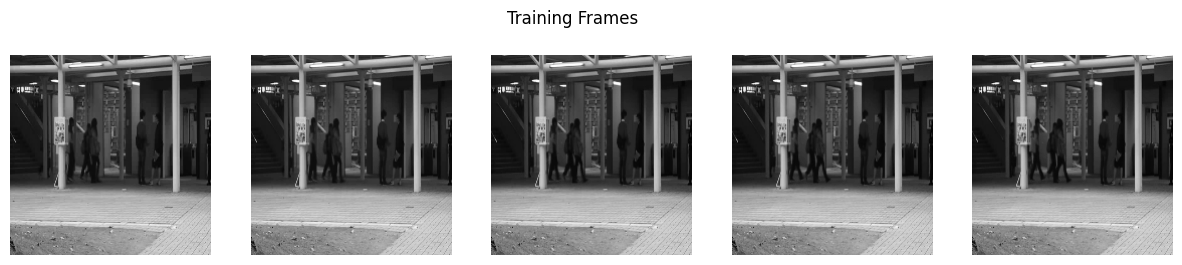

Displaying some testing frames:


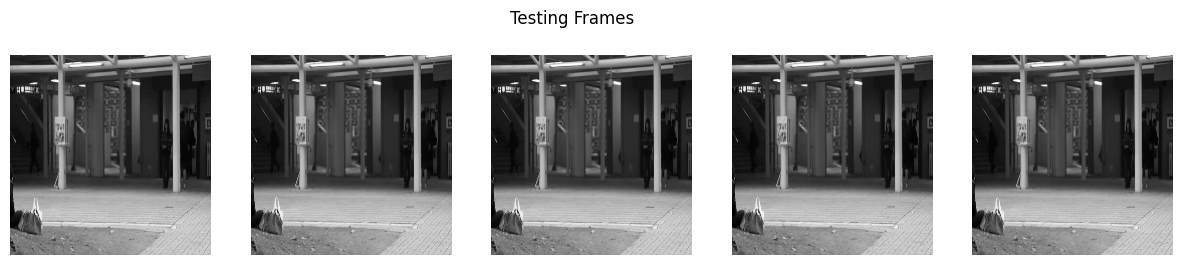

Displaying some CutPaste augmented training frames:


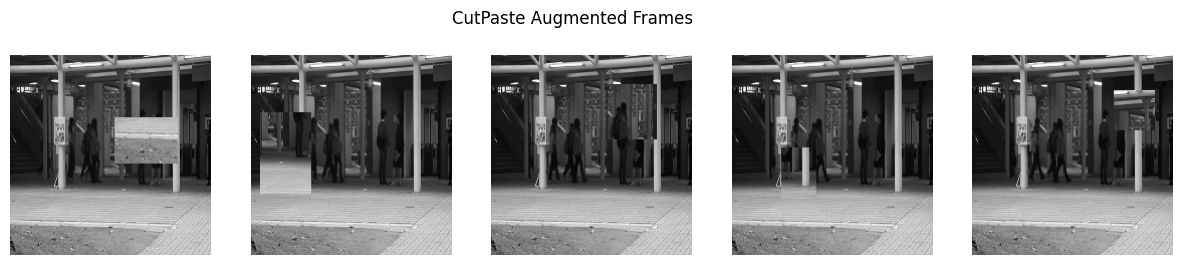

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 200, 200, 3)    │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)             

 Total params: 58,637,377 (223.68 MB)

 Trainable params: 266,433 (1.02 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 131s 483ms/step - accuracy: 0.5116 - loss: 0.6923 - val_accuracy: 0.6983 - val_loss: 0.6796
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.5943 - loss: 0.6759 - val_accuracy: 0.7048 - val_loss: 0.6580
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 82s 379ms/step - accuracy: 0.6785 - loss: 0.6519 - val_accuracy: 0.7348 - val_loss: 0.6275
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.6996 - loss: 0.6210 - val_accuracy: 0.7567 - val_loss: 0.5907
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.7393 - loss: 0.5827 - val_accuracy: 0.7720 - val_loss: 0.5452
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.7610 - loss: 0.5416 - val_accuracy: 0.7831 - val_loss: 0.5167
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 81s 376ms/step - accuracy: 0.7694 - loss: 0.5140 - val_accuracy: 0.7805 - val_loss: 0.4897
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 81s 376ms/step - accuracy: 0.7808 - loss: 

In [1]:
import os
import cv2  # OpenCV for image operations (https://opencv.org/) cite:oaicite:1
import numpy as np
import tensorflow as tf  # TensorFlow for deep learning (https://www.tensorflow.org/) cite:oaicite:2
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score  # scikit-learn (https://scikit-learn.org/stable/) cite:oaicite:3
import matplotlib.pyplot as plt  # matplotlib for plotting (https://matplotlib.org/) cite:oaicite:4

# ------------------------------------------------------------------------------
# Dataset Setup
# ------------------------------------------------------------------------------
DATASET_PATH = '/kaggle/input/avenue/avenue'
input_shape = (200, 200, 1)

# ------------------------------------------------------------------------------
# 1. Data Loading Functions (unchanged)
# ------------------------------------------------------------------------------
def load_train_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    Each subfolder (e.g. '01', '02', ...) is assumed to hold frames for one video.
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

def load_test_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

# ------------------------------------------------------------------------------
# 2. Abnormal Frame Ranges (Manually Provided, unchanged)
# ------------------------------------------------------------------------------
abnormal_frame_ranges = [
    range(78, 393),
    range(273, 725),
    range(295, 583),
    range(380, 650),
    range(469, 787),
    range(345, 857),
    range(423, 564),
    range(21, 31),
    range(136, 497),
    range(571, 638),
    range(21, 309),
    range(539, 646),
    range(259, 459),
    range(399, 486),
    range(498, 588),
    range(632, 731),
    range(21, 100),
    range(21, 286),
    range(109, 241),
    range(65, 169),
    range(14, 67),
]

def load_and_divide_test_dataset(directory, abnormal_frame_ranges):
    """
    Loads test images from subfolders and splits them into normal (label=0)
    and abnormal (label=1) frames based on pre-defined abnormal_frame_ranges.
    """
    normal_frames = []
    abnormal_frames = []
    normal_labels = []
    abnormal_labels = []
    folder_index = 0

    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if not os.path.isdir(folder_path):
            continue
        if folder_index >= len(abnormal_frame_ranges):
            print(f"Warning: More subfolders than abnormal_frame_ranges entries. Skipping '{folder}'")
            continue

        frame_range = abnormal_frame_ranges[folder_index]
        file_index = 1

        print(f"Processing folder: {folder}")
        print(f"Abnormal frame range: {frame_range}")

        for filename in sorted(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, filename)
            if not os.path.isfile(img_path):
                continue
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (200, 200))
                    img = img.astype('float32') / 255.0

                    if file_index in frame_range:
                        abnormal_frames.append(img)
                        abnormal_labels.append(1)
                    else:
                        normal_frames.append(img)
                        normal_labels.append(0)
                file_index += 1
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
        folder_index += 1

    normal_frames = np.array(normal_frames).reshape(-1, 200, 200, 1)
    abnormal_frames = np.array(abnormal_frames).reshape(-1, 200, 200, 1)
    normal_labels = np.zeros((len(normal_frames), 1))
    abnormal_labels = np.ones((len(abnormal_frames), 1))
    return normal_frames, abnormal_frames, normal_labels, abnormal_labels

# ------------------------------------------------------------------------------
# 3. Load the Training & Testing Data (unchanged)
# ------------------------------------------------------------------------------
train_path = os.path.join(DATASET_PATH, "training", "frames")
test_path  = os.path.join(DATASET_PATH, "testing", "frames")

try:
    avenue_xTrain = load_train_dataset(train_path)
    print("Shape of avenue_xTrain:", avenue_xTrain.shape)
    if avenue_xTrain.shape[0] == 0:
        raise ValueError("Training dataset is empty. Check directory: " + train_path)
except Exception as e:
    print(f"Error loading training dataset: {e}")
    raise

try:
    avenue_xTest = load_test_dataset(test_path)
    print("Shape of avenue_xTest:", avenue_xTest.shape)
except Exception as e:
    print(f"Error loading test dataset: {e}")
    raise

try:
    (avenue_xTest_normal,
     avenue_xTest_abnormal,
     avenue_yTest_normal,
     avenue_yTest_abnormal) = load_and_divide_test_dataset(test_path, abnormal_frame_ranges)
    print("Shape of avenue_xTest_normal:", avenue_xTest_normal.shape)
    print("Shape of avenue_xTest_abnormal:", avenue_xTest_abnormal.shape)
    print("Shape of avenue_yTest_normal:", avenue_yTest_normal.shape)
    print("Shape of avenue_yTest_abnormal:", avenue_yTest_abnormal.shape)
except Exception as e:
    print(f"Error loading/dividing test dataset: {e}")
    raise

# ------------------------------------------------------------------------------
# 4. Visualization Function (unchanged)
# ------------------------------------------------------------------------------
def plot_images(images, title, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(input_shape[:2]), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

print("Displaying some training frames:")
plot_images(avenue_xTrain, "Training Frames", n=5)
print("Displaying some testing frames:")
plot_images(avenue_xTest, "Testing Frames", n=5)

# ------------------------------------------------------------------------------
# 5. CUTPASTE AUGMENTATION FUNCTIONS
# ------------------------------------------------------------------------------
def cutpaste_augmentation(image, area_ratio=(0.02, 0.15), aspect_ratio_range=(0.3, 1/0.3)):
    """
    Performs CutPaste augmentation on a single image.
    A random patch is cut from the image and pasted into a different location.
    
    Adapted from:
    "CutPaste: Self-Supervised Learning for Anomaly Detection and Localization"  
    (Li et al., 2021, https://arxiv.org/abs/2106.08992) cite:oaicite:5
    """
    H, W, C = image.shape
    image_area = H * W
    patch_area = np.random.uniform(area_ratio[0], area_ratio[1]) * image_area
    aspect_ratio = np.random.uniform(aspect_ratio_range[0], aspect_ratio_range[1])
    patch_h = int(round(np.sqrt(patch_area * aspect_ratio)))
    patch_w = int(round(np.sqrt(patch_area / aspect_ratio)))
    patch_h = min(patch_h, H)
    patch_w = min(patch_w, W)
    # Randomly select patch location to cut
    x1 = np.random.randint(0, H - patch_h + 1)
    y1 = np.random.randint(0, W - patch_w + 1)
    patch = image[x1:x1+patch_h, y1:y1+patch_w, :].copy()
    # Randomly select location to paste the patch
    x2 = np.random.randint(0, H - patch_h + 1)
    y2 = np.random.randint(0, W - patch_w + 1)
    augmented = image.copy()
    augmented[x2:x2+patch_h, y2:y2+patch_w, :] = patch
    return augmented

def create_cutpaste_dataset(X):
    """
    For each image in the training dataset, generate a CutPaste-augmented version.
    """
    augmented_images = np.array([cutpaste_augmentation(img) for img in X])
    return augmented_images

# Generate CutPaste augmented training data
augmented_xTrain = create_cutpaste_dataset(avenue_xTrain)

# Create labels: original images are normal (0), and augmented images are synthetic anomalies (1)
labels_normal = np.zeros((avenue_xTrain.shape[0], 1))
labels_anomaly = np.ones((augmented_xTrain.shape[0], 1))

# Combine the normal and augmented images
X_train_combined = np.concatenate([avenue_xTrain, augmented_xTrain], axis=0)
y_train_combined = np.concatenate([labels_normal, labels_anomaly], axis=0)

# Shuffle the combined training dataset
perm = np.random.permutation(X_train_combined.shape[0])
X_train_combined = X_train_combined[perm]
y_train_combined = y_train_combined[perm]

# ------------------------------------------------------------------------------
# 5a. Visualization: Display Augmented Training Frames
# ------------------------------------------------------------------------------
# Here we display a few examples of the CutPaste augmented images.
print("Displaying some CutPaste augmented training frames:")
# Slicing the first 5 augmented images for display
plot_images(augmented_xTrain[:5], "CutPaste Augmented Frames", n=5)

# ------------------------------------------------------------------------------
# 6. Build a ResNet152-based Model for CutPaste-based Anomaly Detection
# ------------------------------------------------------------------------------
def create_resnet_model_cutpaste(input_shape):
    """
    Creates a model that uses ResNet152 as a feature extractor (replicating the grayscale
    channel to 3 channels) and adds a binary classification head.
    
    The classifier is trained to distinguish between original (normal) images and 
    CutPaste-augmented (anomalous) images.
    """
    base_input = layers.Input(shape=input_shape)  # (200,200,1)
    # Replicate the single channel to 3 channels
    x = layers.Concatenate()([base_input, base_input, base_input])  # now (200,200,3)
    base_model = tf.keras.applications.ResNet152(
        include_top=False,
        weights='imagenet',
        input_tensor=x
    )
    # Freeze ResNet152 layers (optional)
    for layer in base_model.layers:
        layer.trainable = False
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    # Binary classification head: probability of being a CutPaste-augmented anomaly
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=base_input, outputs=outputs)
    return model

model_cutpaste = create_resnet_model_cutpaste(input_shape)
model_cutpaste.summary()

# ------------------------------------------------------------------------------
# 7. Train the Model using Binary Crossentropy Loss
# ------------------------------------------------------------------------------
model_cutpaste.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

model_cutpaste.fit(X_train_combined, y_train_combined, epochs=50, batch_size=128, validation_split=0.1)

# ------------------------------------------------------------------------------
# 8. Evaluate on Test Data using the Trained Classifier
# ------------------------------------------------------------------------------
# Here, we use the same division of test data (normal vs. abnormal) as before.
# We compute the anomaly score as the classifier’s predicted probability.

normal_probs = model_cutpaste.predict(avenue_xTest_normal, batch_size=128)
abnormal_probs = model_cutpaste.predict(avenue_xTest_abnormal, batch_size=128)

y_true_test = np.concatenate([avenue_yTest_normal, avenue_yTest_abnormal]).ravel()
y_scores_test = np.concatenate([normal_probs, abnormal_probs]).ravel()

precisions, recalls, thresholds = precision_recall_curve(y_true_test, y_scores_test)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
max_f1 = np.max(f1_scores)
optimal_idx = np.argmax(f1_scores) if thresholds.size > 0 else None
optimal_threshold = thresholds[optimal_idx] if optimal_idx is not None else None

print("Maximum F1 Score: {:.4f}".format(max_f1))
print("Optimal threshold for classification: {:.4f}".format(optimal_threshold))

y_pred_test = (y_scores_test >= optimal_threshold).astype(int) if optimal_threshold is not None else np.zeros_like(y_true_test)
f1_val_test = f1_score(y_true_test, y_pred_test)
print("F1 Score at optimal threshold: {:.4f}".format(f1_val_test))

pr_auc_test = average_precision_score(y_true_test, y_scores_test)
print("Precision-Recall AUC (Average Precision): {:.4f}".format(pr_auc_test))


# Elastic Deformations (Deformable Augmentation)

Shape of avenue_xTrain: (15328, 200, 200, 1)
Shape of avenue_xTest: (15324, 200, 200, 1)
Processing folder: 01
Abnormal frame range: range(78, 393)
Processing folder: 02
Abnormal frame range: range(273, 725)
Processing folder: 03
Abnormal frame range: range(295, 583)
Processing folder: 04
Abnormal frame range: range(380, 650)
Processing folder: 05
Abnormal frame range: range(469, 787)
Processing folder: 06
Abnormal frame range: range(345, 857)
Processing folder: 07
Abnormal frame range: range(423, 564)
Processing folder: 08
Abnormal frame range: range(21, 31)
Processing folder: 09
Abnormal frame range: range(136, 497)
Processing folder: 10
Abnormal frame range: range(571, 638)
Processing folder: 11
Abnormal frame range: range(21, 309)
Processing folder: 12
Abnormal frame range: range(539, 646)
Processing folder: 13
Abnormal frame range: range(259, 459)
Processing folder: 14
Abnormal frame range: range(399, 486)
Processing folder: 15
Abnormal frame range: range(498, 588)
Processing fold

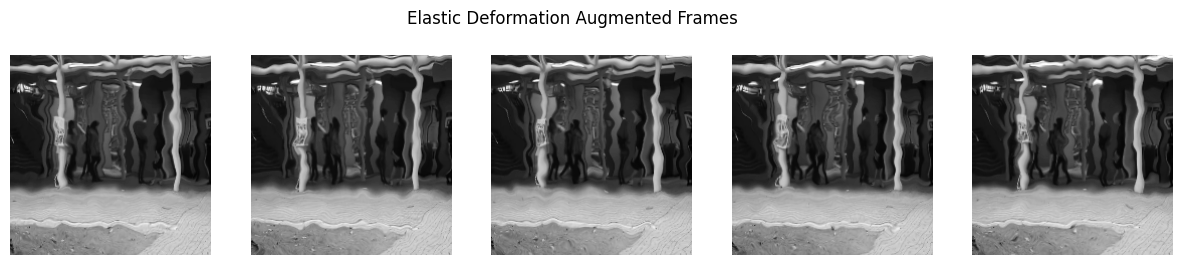

Displaying some training frames:


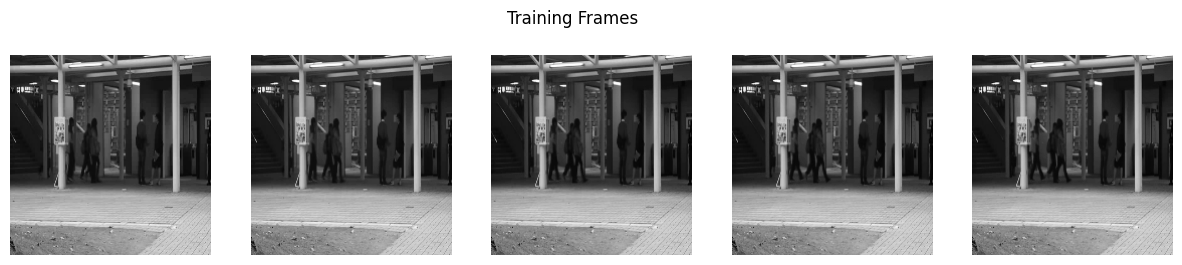

Displaying some testing frames:


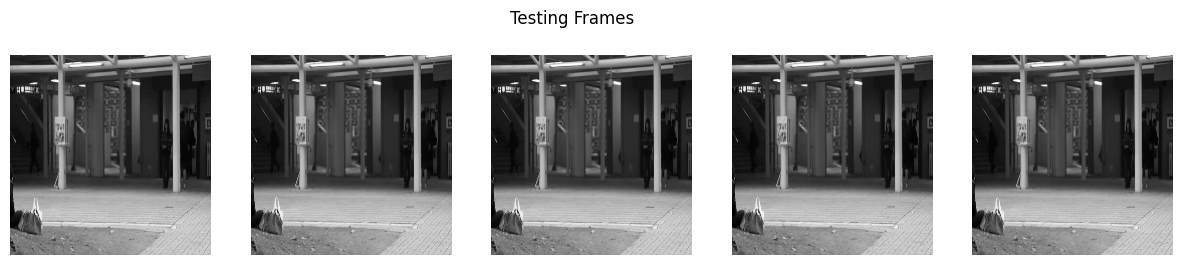

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 200, 200, 3)    │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)             

 Total params: 58,637,344 (223.68 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

120/120 ━━━━━━━━━━━━━━━━━━━━ 108s 777ms/step
Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - loss: 0.0349 - val_loss: 0.0260
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 882ms/step - loss: 0.0060 - val_loss: 0.0198
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 875ms/step - loss: 0.0047 - val_loss: 0.0175
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 877ms/step - loss: 0.0038 - val_loss: 0.0149
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 879ms/step - loss: 0.0033 - val_loss: 0.0140
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 876ms/step - loss: 0.0029 - val_loss: 0.0118
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 875ms/step - loss: 0.0025 - val_loss: 0.0110
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 880ms/step - loss: 0.0024 - val_loss: 0.0098
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 877ms/step - loss: 0.0022 - val_loss: 0.0091
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 875ms/step - loss: 0.0020 - val_loss: 0.0083
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 876ms/step - loss: 0.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, map_coordinates

# ------------------------------------------------------------------------------
# Elastic Deformations (Deformable Augmentation)
# ------------------------------------------------------------------------------
def elastic_transform(image, alpha, sigma, random_state=None):
    """
    Applies elastic deformation to an image.

    Parameters:
      image: 2D numpy array (grayscale image)
      alpha: Scaling factor to control the intensity of the deformation.
      sigma: Standard deviation for the Gaussian filter (controls deformation smoothness).
      random_state: (optional) NumPy RandomState for reproducibility.

    Returns:
      Elastically deformed image.
      
    This method is based on the elastic deformation technique introduced by
    Simard et al. (2003), and it leverages SciPy’s gaussian_filter and map_coordinates.
    """
    if random_state is None:
        random_state = np.random.RandomState(None)
    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))
    distorted_image = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)
    return distorted_image

# ------------------------------------------------------------------------------
# Dataset Setup and Data Loading Functions
# ------------------------------------------------------------------------------
DATASET_PATH = '/kaggle/input/avenue/avenue'
input_shape = (200, 200, 1)

def load_train_dataset(directory):
    """
    Loads images from the given directory (with subfolders for each video).
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

def load_test_dataset(directory):
    """
    Loads test images from the given directory (with subfolders for each video).
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

# ------------------------------------------------------------------------------
# Abnormal Frame Ranges (Manually Provided)
# ------------------------------------------------------------------------------
abnormal_frame_ranges = [
    range(78, 393),
    range(273, 725),
    range(295, 583),
    range(380, 650),
    range(469, 787),
    range(345, 857),
    range(423, 564),
    range(21, 31),
    range(136, 497),
    range(571, 638),
    range(21, 309),
    range(539, 646),
    range(259, 459),
    range(399, 486),
    range(498, 588),
    range(632, 731),
    range(21, 100),
    range(21, 286),
    range(109, 241),
    range(65, 169),
    range(14, 67),
]

def load_and_divide_test_dataset(directory, abnormal_frame_ranges):
    """
    Loads test images from subfolders and splits them into normal (label 0)
    and abnormal (label 1) based on pre-defined abnormal_frame_ranges.
    """
    normal_frames = []
    abnormal_frames = []
    normal_labels = []
    abnormal_labels = []
    folder_index = 0

    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if not os.path.isdir(folder_path):
            continue
        if folder_index >= len(abnormal_frame_ranges):
            print(f"Warning: More subfolders than abnormal_frame_ranges entries. Skipping '{folder}'")
            continue

        frame_range = abnormal_frame_ranges[folder_index]
        file_index = 1

        print(f"Processing folder: {folder}")
        print(f"Abnormal frame range: {frame_range}")

        for filename in sorted(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, filename)
            if not os.path.isfile(img_path):
                continue
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (200, 200))
                    img = img.astype('float32') / 255.0

                    if file_index in frame_range:
                        abnormal_frames.append(img)
                        abnormal_labels.append(1)
                    else:
                        normal_frames.append(img)
                        normal_labels.append(0)
                file_index += 1
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
        folder_index += 1

    normal_frames = np.array(normal_frames).reshape(-1, 200, 200, 1)
    abnormal_frames = np.array(abnormal_frames).reshape(-1, 200, 200, 1)
    normal_labels = np.zeros((len(normal_frames), 1))
    abnormal_labels = np.ones((len(abnormal_frames), 1))
    return normal_frames, abnormal_frames, normal_labels, abnormal_labels

# ------------------------------------------------------------------------------
# Visualization Function
# ------------------------------------------------------------------------------
def plot_images(images, title, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(input_shape[:2]), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# ------------------------------------------------------------------------------
# 3. Load the Training & Testing Data
# ------------------------------------------------------------------------------
train_path = os.path.join(DATASET_PATH, "training", "frames")
test_path  = os.path.join(DATASET_PATH, "testing", "frames")

avenue_xTrain = load_train_dataset(train_path)
print("Shape of avenue_xTrain:", avenue_xTrain.shape)

avenue_xTest = load_test_dataset(test_path)
print("Shape of avenue_xTest:", avenue_xTest.shape)

(avenue_xTest_normal,
 avenue_xTest_abnormal,
 avenue_yTest_normal,
 avenue_yTest_abnormal) = load_and_divide_test_dataset(test_path, abnormal_frame_ranges)
print("Shape of avenue_xTest_normal:", avenue_xTest_normal.shape)
print("Shape of avenue_xTest_abnormal:", avenue_xTest_abnormal.shape)
print("Shape of avenue_yTest_normal:", avenue_yTest_normal.shape)
print("Shape of avenue_yTest_abnormal:", avenue_yTest_abnormal.shape)

# ------------------------------------------------------------------------------
# Elastic Deformation Augmentation on Training Data
# ------------------------------------------------------------------------------
# Generate and display some elastically deformed training frames
elastic_images = []
num_samples = 5
for i in range(num_samples):
    img = avenue_xTrain[i].squeeze()  # Use the loaded training image
    deformed_img = elastic_transform(img, alpha=34, sigma=4)
    elastic_images.append(deformed_img.reshape(input_shape[:2]))

print("Displaying some Elastically Deformed training frames:")
plot_images(np.array(elastic_images).reshape(-1, 200, 200, 1), "Elastic Deformation Augmented Frames", n=5)

# Display the original training and testing frames for comparison
print("Displaying some training frames:")
plot_images(avenue_xTrain, "Training Frames", n=5)
print("Displaying some testing frames:")
plot_images(avenue_xTest, "Testing Frames", n=5)

# ------------------------------------------------------------------------------
# ResNet152-based Model for Deep SVDD
# ------------------------------------------------------------------------------
def create_resnet_model(input_shape):
    """
    Creates a ResNet152-based model for Deep SVDD.
    The model converts grayscale images to 3-channel images,
    passes them through ResNet152 (with pretrained ImageNet weights),
    and outputs a 32-dimensional latent representation.
    """
    base_input = layers.Input(shape=input_shape)  # (200,200,1)
    
    # Replicate the grayscale channel to create a 3-channel image.
    x = layers.Concatenate()([base_input, base_input, base_input])  # now (200,200,3)
    
    # Load ResNet152 without the top layers using pretrained ImageNet weights.
    base_model = tf.keras.applications.ResNet152(
        include_top=False,
        weights='imagenet',
        input_tensor=x
    )
    
    # Optionally freeze ResNet152 layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Global Average Pooling to reduce spatial dimensions.
    x = layers.GlobalAveragePooling2D()(base_model.output)
    
    # Dense layer for additional feature abstraction.
    x = layers.Dense(128, activation='relu')(x)
    
    # Final output layer for the latent representation (32 dimensions).
    outputs = layers.Dense(32, activation=None)(x)
    
    model = models.Model(inputs=base_input, outputs=outputs)
    return model

model = create_resnet_model(input_shape)
model.summary()

# ------------------------------------------------------------------------------
# Compute Center c in the Latent Space (Deep SVDD)
# ------------------------------------------------------------------------------
train_features = model.predict(avenue_xTrain, batch_size=128)
c = np.mean(train_features, axis=0)
# Avoid near-zero values in the center
c[np.abs(c) < 1e-6] = 1e-6  
c_tf = tf.constant(c, dtype=tf.float32)

# ------------------------------------------------------------------------------
# Deep SVDD Loss Function
# ------------------------------------------------------------------------------
def deep_svdd_loss(y_true, y_pred):
    return tf.reduce_mean(tf.reduce_sum(tf.square(y_pred - c_tf), axis=1))

dummy_labels = np.zeros((avenue_xTrain.shape[0], 1))
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss=deep_svdd_loss)

if avenue_xTrain.shape[0] < 128:
    print("Warning: Training dataset size is smaller than the batch size.")

# Train the model for 50 epochs (adjust as needed)
model.fit(avenue_xTrain, dummy_labels, epochs=50, batch_size=128, validation_split=0.1)

# ------------------------------------------------------------------------------
# Compute Anomaly Scores on Test Data
# ------------------------------------------------------------------------------
def compute_anomaly_scores(model, data, center):
    features = model.predict(data, batch_size=128)
    scores = np.sum((features - center)**2, axis=1)
    return scores

test_scores = compute_anomaly_scores(model, avenue_xTest, c)
print("Mean anomaly score (entire test set):", np.mean(test_scores))

normal_scores = compute_anomaly_scores(model, avenue_xTest_normal, c)
abnormal_scores = compute_anomaly_scores(model, avenue_xTest_abnormal, c)
print("Mean anomaly score (normal frames):", np.mean(normal_scores))
print("Mean anomaly score (abnormal frames):", np.mean(abnormal_scores))

# ------------------------------------------------------------------------------
# Evaluation: F1 Score and Precision-Recall AUC
# ------------------------------------------------------------------------------
y_true = np.concatenate([avenue_yTest_normal, avenue_yTest_abnormal]).ravel()
y_scores = np.concatenate([normal_scores, abnormal_scores])

precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
max_f1 = np.max(f1_scores)
optimal_idx = np.argmax(f1_scores) if thresholds.size > 0 else None
optimal_threshold = thresholds[optimal_idx] if optimal_idx is not None else None

print("Maximum F1 Score: {:.4f}".format(max_f1))
print("Optimal threshold for classification: {:.4f}".format(optimal_threshold))

y_pred = (y_scores >= optimal_threshold).astype(int) if optimal_threshold is not None else np.zeros_like(y_true)
f1_val = f1_score(y_true, y_pred)
print("F1 Score at optimal threshold: {:.4f}".format(f1_val))

pr_auc = average_precision_score(y_true, y_scores)
print("Precision-Recall AUC (Average Precision): {:.4f}".format(pr_auc))


# Fourier Domain Adaptation (Frequency-Based Augmentation)

Shape of avenue_xTrain: (15328, 200, 200, 1)
Shape of avenue_xTest: (15324, 200, 200, 1)
Processing folder: 01
Abnormal frame range: range(78, 393)
Processing folder: 02
Abnormal frame range: range(273, 725)
Processing folder: 03
Abnormal frame range: range(295, 583)
Processing folder: 04
Abnormal frame range: range(380, 650)
Processing folder: 05
Abnormal frame range: range(469, 787)
Processing folder: 06
Abnormal frame range: range(345, 857)
Processing folder: 07
Abnormal frame range: range(423, 564)
Processing folder: 08
Abnormal frame range: range(21, 31)
Processing folder: 09
Abnormal frame range: range(136, 497)
Processing folder: 10
Abnormal frame range: range(571, 638)
Processing folder: 11
Abnormal frame range: range(21, 309)
Processing folder: 12
Abnormal frame range: range(539, 646)
Processing folder: 13
Abnormal frame range: range(259, 459)
Processing folder: 14
Abnormal frame range: range(399, 486)
Processing folder: 15
Abnormal frame range: range(498, 588)
Processing fold

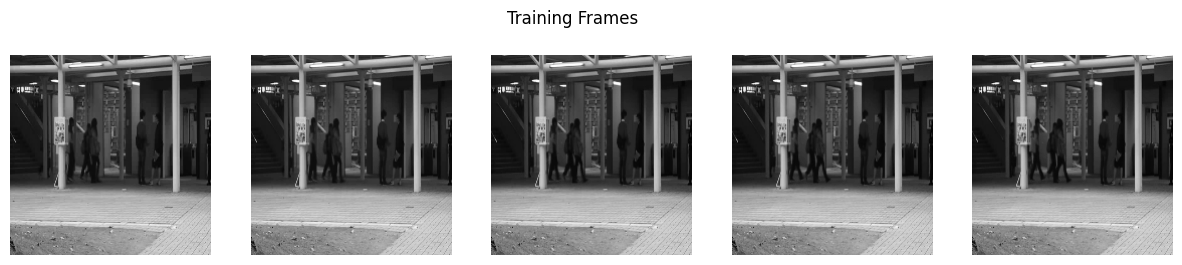

Displaying some testing frames:


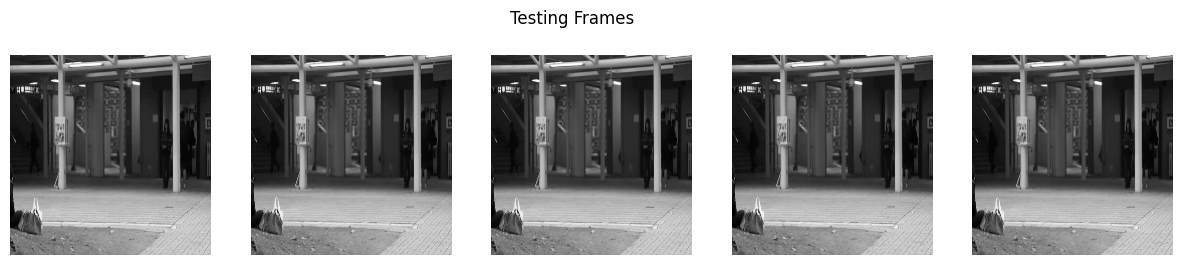

Displaying some Elastically Deformed training frames:


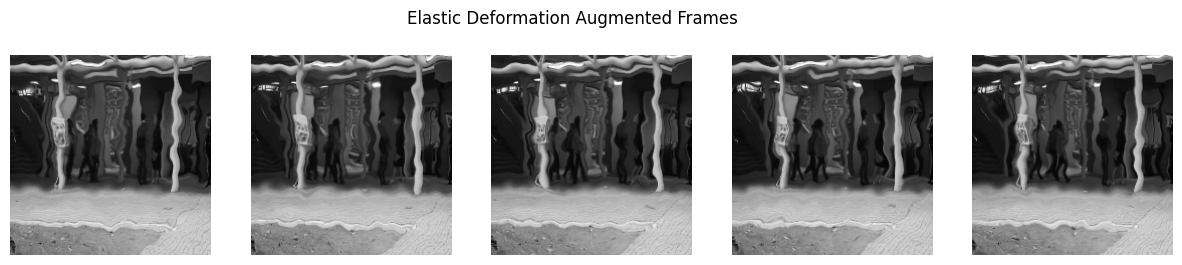

Displaying some Fourier Domain Augmented training frames:


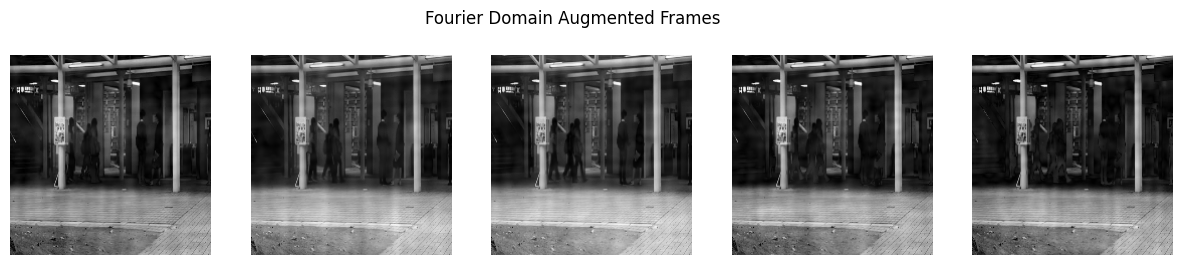

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200, 200, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 200, 200, 3)    │              0 │ input_layer_1[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 58,637,344 (223.68 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

120/120 ━━━━━━━━━━━━━━━━━━━━ 109s 852ms/step
Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - loss: 0.0329 - val_loss: 0.0159
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 884ms/step - loss: 0.0062 - val_loss: 0.0124
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 874ms/step - loss: 0.0046 - val_loss: 0.0104
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 870ms/step - loss: 0.0038 - val_loss: 0.0095
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 874ms/step - loss: 0.0033 - val_loss: 0.0082
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 877ms/step - loss: 0.0029 - val_loss: 0.0083
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 876ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 877ms/step - loss: 0.0025 - val_loss: 0.0070
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 875ms/step - loss: 0.0022 - val_loss: 0.0065
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 873ms/step - loss: 0.0021 - val_loss: 0.0066
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 878ms/step - loss: 0.

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, map_coordinates

# ------------------------------------------------------------------------------
# Elastic Deformations (Deformable Augmentation)
# ------------------------------------------------------------------------------
def elastic_transform(image, alpha, sigma, random_state=None):
    """
    Applies elastic deformation to an image.
    
    Parameters:
      image: 2D numpy array (grayscale image)
      alpha: Scaling factor that controls the intensity of the deformation.
      sigma: Standard deviation for the Gaussian filter (controls smoothness).
      random_state: (optional) NumPy RandomState for reproducibility.
    
    Returns:
      Elastically deformed image.
      
    Based on the method described by Simard et al. (2003).
    """
    if random_state is None:
        random_state = np.random.RandomState(None)
    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))
    distorted_image = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)
    return distorted_image

# ------------------------------------------------------------------------------
# Fourier Domain Adaptation (Frequency-Based Augmentation)
# ------------------------------------------------------------------------------
def fourier_domain_augmentation(image, beta=0.1):
    """
    Applies frequency-based augmentation using Fourier Domain Adaptation (FDA).
    This function perturbs the low-frequency amplitude components of the image.
    
    Parameters:
      image: 2D numpy array (grayscale image)
      beta: Controls the size of the low-frequency band (relative to image dimensions).
      
    Returns:
      Augmented image with modified low-frequency components.
      
    This technique leverages the Fourier transform ([NumPy FFT](https://numpy.org/doc/stable/reference/routines.fft.html))
    and is inspired by methods in domain adaptation (see [Fourier Domain Adaptation for Semantic Segmentation](https://openaccess.thecvf.com/content_CVPR_2021/html/Liu_Fourier_Domain_Adaptation_for_Semantic_Segmentation_CVPR_2021_paper.html)).
    """
    h, w = image.shape
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    
    amplitude = np.abs(fshift)
    phase = np.angle(fshift)
    
    # Determine the size of the low-frequency region
    b = int(beta * min(h, w))
    c_h, c_w = h // 2, w // 2
    
    # Augment the low-frequency amplitude by applying a random scaling factor
    amp_aug = amplitude.copy()
    random_factor = np.random.uniform(0.5, 1.5, size=(2*b, 2*b))
    amp_aug[c_h-b:c_h+b, c_w-b:c_w+b] *= random_factor
    
    # Reconstruct the FFT with augmented amplitude
    fshift_aug = amp_aug * np.exp(1j * phase)
    f_ishift = np.fft.ifftshift(fshift_aug)
    img_back = np.fft.ifft2(f_ishift)
    img_aug = np.abs(img_back)
    # Normalize the image to [0, 1]
    img_aug = (img_aug - img_aug.min()) / (img_aug.max() - img_aug.min() + 1e-8)
    return img_aug

# ------------------------------------------------------------------------------
# Dataset Setup
# ------------------------------------------------------------------------------
DATASET_PATH = '/kaggle/input/avenue/avenue'
input_shape = (200, 200, 1)

# ------------------------------------------------------------------------------
# 1. Data Loading Functions
# ------------------------------------------------------------------------------
def load_train_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    Each subfolder (e.g. '01', '02', ...) is assumed to hold frames for one video.
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

def load_test_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

# ------------------------------------------------------------------------------
# 2. Abnormal Frame Ranges (Manually Provided)
# ------------------------------------------------------------------------------
abnormal_frame_ranges = [
    range(78, 393),
    range(273, 725),
    range(295, 583),
    range(380, 650),
    range(469, 787),
    range(345, 857),
    range(423, 564),
    range(21, 31),
    range(136, 497),
    range(571, 638),
    range(21, 309),
    range(539, 646),
    range(259, 459),
    range(399, 486),
    range(498, 588),
    range(632, 731),
    range(21, 100),
    range(21, 286),
    range(109, 241),
    range(65, 169),
    range(14, 67),
]

def load_and_divide_test_dataset(directory, abnormal_frame_ranges):
    """
    Loads test images from subfolders and splits them into normal (label=0)
    and abnormal (label=1) frames based on pre-defined abnormal_frame_ranges.
    """
    normal_frames = []
    abnormal_frames = []
    normal_labels = []
    abnormal_labels = []
    folder_index = 0

    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if not os.path.isdir(folder_path):
            continue
        if folder_index >= len(abnormal_frame_ranges):
            print(f"Warning: More subfolders than abnormal_frame_ranges entries. Skipping '{folder}'")
            continue

        frame_range = abnormal_frame_ranges[folder_index]
        file_index = 1

        print(f"Processing folder: {folder}")
        print(f"Abnormal frame range: {frame_range}")

        for filename in sorted(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, filename)
            if not os.path.isfile(img_path):
                continue
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (200, 200))
                    img = img.astype('float32') / 255.0

                    if file_index in frame_range:
                        abnormal_frames.append(img)
                        abnormal_labels.append(1)
                    else:
                        normal_frames.append(img)
                        normal_labels.append(0)
                file_index += 1
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
        folder_index += 1

    normal_frames = np.array(normal_frames).reshape(-1, 200, 200, 1)
    abnormal_frames = np.array(abnormal_frames).reshape(-1, 200, 200, 1)
    normal_labels = np.zeros((len(normal_frames), 1))
    abnormal_labels = np.ones((len(abnormal_frames), 1))
    return normal_frames, abnormal_frames, normal_labels, abnormal_labels

# ------------------------------------------------------------------------------
# 3. Load the Training & Testing Data
# ------------------------------------------------------------------------------
# Update paths to point to the 'frames' subdirectory
train_path = os.path.join(DATASET_PATH, "training", "frames")
test_path  = os.path.join(DATASET_PATH, "testing", "frames")

try:
    avenue_xTrain = load_train_dataset(train_path)
    print("Shape of avenue_xTrain:", avenue_xTrain.shape)
    if avenue_xTrain.shape[0] == 0:
        raise ValueError("Training dataset is empty. Check directory: " + train_path)
except Exception as e:
    print(f"Error loading training dataset: {e}")
    raise

try:
    avenue_xTest = load_test_dataset(test_path)
    print("Shape of avenue_xTest:", avenue_xTest.shape)
except Exception as e:
    print(f"Error loading test dataset: {e}")
    raise

try:
    (avenue_xTest_normal,
     avenue_xTest_abnormal,
     avenue_yTest_normal,
     avenue_yTest_abnormal) = load_and_divide_test_dataset(test_path, abnormal_frame_ranges)
    print("Shape of avenue_xTest_normal:", avenue_xTest_normal.shape)
    print("Shape of avenue_xTest_abnormal:", avenue_xTest_abnormal.shape)
    print("Shape of avenue_yTest_normal:", avenue_yTest_normal.shape)
    print("Shape of avenue_yTest_abnormal:", avenue_yTest_abnormal.shape)
except Exception as e:
    print(f"Error loading/dividing test dataset: {e}")
    raise

# ------------------------------------------------------------------------------
# 4. Visualization Function
# ------------------------------------------------------------------------------
def plot_images(images, title, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(input_shape[:2]), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

print("Displaying some training frames:")
plot_images(avenue_xTrain, "Training Frames", n=5)
print("Displaying some testing frames:")
plot_images(avenue_xTest, "Testing Frames", n=5)

# ------------------------------------------------------------------------------
# Elastic Deformation Augmentation on Training Data
# ------------------------------------------------------------------------------
elastic_images = []
num_samples = 5
for i in range(num_samples):
    img = avenue_xTrain[i].squeeze()  # Use the loaded training image
    deformed_img = elastic_transform(img, alpha=34, sigma=4)
    elastic_images.append(deformed_img.reshape(input_shape[:2]))

print("Displaying some Elastically Deformed training frames:")
plot_images(np.array(elastic_images).reshape(-1, 200, 200, 1), "Elastic Deformation Augmented Frames", n=5)

# ------------------------------------------------------------------------------
# Fourier Domain Augmentation on Training Data
# ------------------------------------------------------------------------------
fourier_images = []
for i in range(num_samples):
    img = avenue_xTrain[i].squeeze()  # Use the loaded training image
    fourier_img = fourier_domain_augmentation(img, beta=0.1)
    fourier_images.append(fourier_img.reshape(input_shape[:2]))

print("Displaying some Fourier Domain Augmented training frames:")
plot_images(np.array(fourier_images).reshape(-1, 200, 200, 1), "Fourier Domain Augmented Frames", n=5)

# ------------------------------------------------------------------------------
# 5. ResNet152-based Model for Deep SVDD
# ------------------------------------------------------------------------------
def create_resnet_model(input_shape):
    """
    Creates a ResNet152-based model for Deep SVDD.
    The model expects grayscale images (200,200,1), replicates the single channel to 3 channels,
    passes them through ResNet152 (with pretrained ImageNet weights), and then adds dense layers to yield
    a 32-dimensional latent representation.
    """
    base_input = layers.Input(shape=input_shape)  # (200,200,1)
    
    # Replicate the grayscale channel to form a 3-channel image.
    x = layers.Concatenate()([base_input, base_input, base_input])  # now (200,200,3)
    
    # Load ResNet152 without the top layers, using pretrained weights.
    base_model = tf.keras.applications.ResNet152(
        include_top=False,
        weights='imagenet',
        input_tensor=x
    )
    
    # Freeze ResNet152 layers (optional)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Global Average Pooling to reduce spatial dimensions.
    x = layers.GlobalAveragePooling2D()(base_model.output)
    
    # A dense layer for additional abstraction.
    x = layers.Dense(128, activation='relu')(x)
    
    # Final output layer for the latent representation (32 dimensions).
    outputs = layers.Dense(32, activation=None)(x)
    
    model = models.Model(inputs=base_input, outputs=outputs)
    return model

model = create_resnet_model(input_shape)
model.summary()

# ------------------------------------------------------------------------------
# 6. Compute Center c in the Latent Space (Deep SVDD)
# ------------------------------------------------------------------------------
train_features = model.predict(avenue_xTrain, batch_size=128)
c = np.mean(train_features, axis=0)
c[np.abs(c) < 1e-6] = 1e-6  # Avoid near-zero values
c_tf = tf.constant(c, dtype=tf.float32)

# ------------------------------------------------------------------------------
# 7. Deep SVDD Loss Function
# ------------------------------------------------------------------------------
def deep_svdd_loss(y_true, y_pred):
    return tf.reduce_mean(tf.reduce_sum(tf.square(y_pred - c_tf), axis=1))

dummy_labels = np.zeros((avenue_xTrain.shape[0], 1))
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss=deep_svdd_loss)

if avenue_xTrain.shape[0] < 128:
    print("Warning: Training dataset size is smaller than the batch size.")

# Train for 50 epochs (or adjust as needed)
model.fit(avenue_xTrain, dummy_labels, epochs=50, batch_size=128, validation_split=0.1)

# ------------------------------------------------------------------------------
# 8. Compute Anomaly Scores on Test Data
# ------------------------------------------------------------------------------
def compute_anomaly_scores(model, data, center):
    features = model.predict(data, batch_size=128)
    scores = np.sum((features - center)**2, axis=1)
    return scores

test_scores = compute_anomaly_scores(model, avenue_xTest, c)
print("Mean anomaly score (entire test set):", np.mean(test_scores))

normal_scores = compute_anomaly_scores(model, avenue_xTest_normal, c)
abnormal_scores = compute_anomaly_scores(model, avenue_xTest_abnormal, c)
print("Mean anomaly score (normal frames):", np.mean(normal_scores))
print("Mean anomaly score (abnormal frames):", np.mean(abnormal_scores))

# ------------------------------------------------------------------------------
# 9. Evaluation: F1 Score and Precision-Recall AUC
# ------------------------------------------------------------------------------
y_true = np.concatenate([avenue_yTest_normal, avenue_yTest_abnormal]).ravel()
y_scores = np.concatenate([normal_scores, abnormal_scores])

precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
max_f1 = np.max(f1_scores)
optimal_idx = np.argmax(f1_scores) if thresholds.size > 0 else None
optimal_threshold = thresholds[optimal_idx] if optimal_idx is not None else None

print("Maximum F1 Score: {:.4f}".format(max_f1))
print("Optimal threshold for classification: {:.4f}".format(optimal_threshold))

y_pred = (y_scores >= optimal_threshold).astype(int) if optimal_threshold is not None else np.zeros_like(y_true)
f1_val = f1_score(y_true, y_pred)
print("F1 Score at optimal threshold: {:.4f}".format(f1_val))

pr_auc = average_precision_score(y_true, y_scores)
print("Precision-Recall AUC (Average Precision): {:.4f}".format(pr_auc))


# Simulated Environmental Effects (Rain, Fog, Occlusion)

Shape of avenue_xTrain: (15328, 200, 200, 1)
Shape of avenue_xTest: (15324, 200, 200, 1)
Processing folder: 01
Abnormal frame range: range(78, 393)
Processing folder: 02
Abnormal frame range: range(273, 725)
Processing folder: 03
Abnormal frame range: range(295, 583)
Processing folder: 04
Abnormal frame range: range(380, 650)
Processing folder: 05
Abnormal frame range: range(469, 787)
Processing folder: 06
Abnormal frame range: range(345, 857)
Processing folder: 07
Abnormal frame range: range(423, 564)
Processing folder: 08
Abnormal frame range: range(21, 31)
Processing folder: 09
Abnormal frame range: range(136, 497)
Processing folder: 10
Abnormal frame range: range(571, 638)
Processing folder: 11
Abnormal frame range: range(21, 309)
Processing folder: 12
Abnormal frame range: range(539, 646)
Processing folder: 13
Abnormal frame range: range(259, 459)
Processing folder: 14
Abnormal frame range: range(399, 486)
Processing folder: 15
Abnormal frame range: range(498, 588)
Processing fold

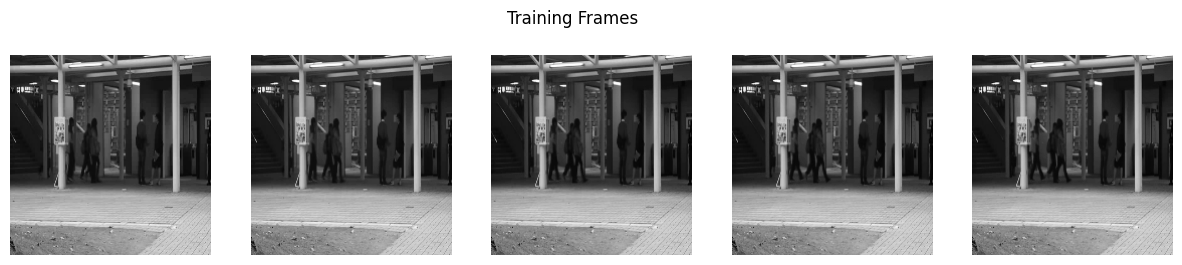

Displaying some testing frames:


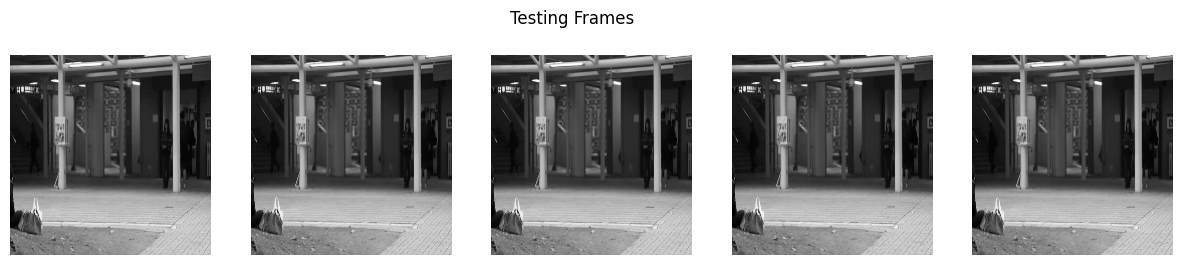

Displaying some Elastically Deformed training frames:


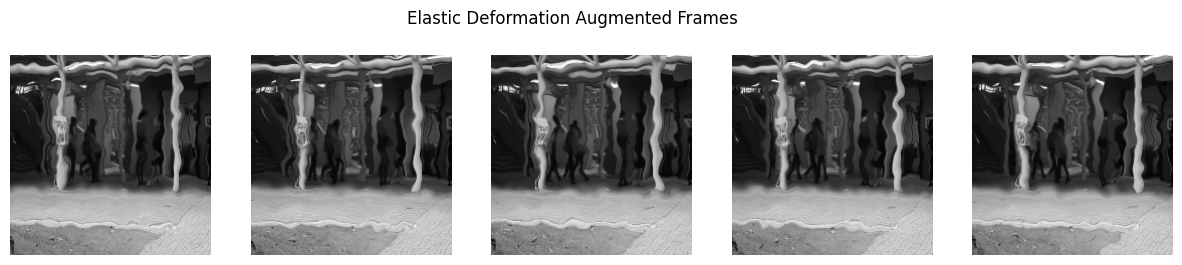

Displaying some Fourier Domain Augmented training frames:


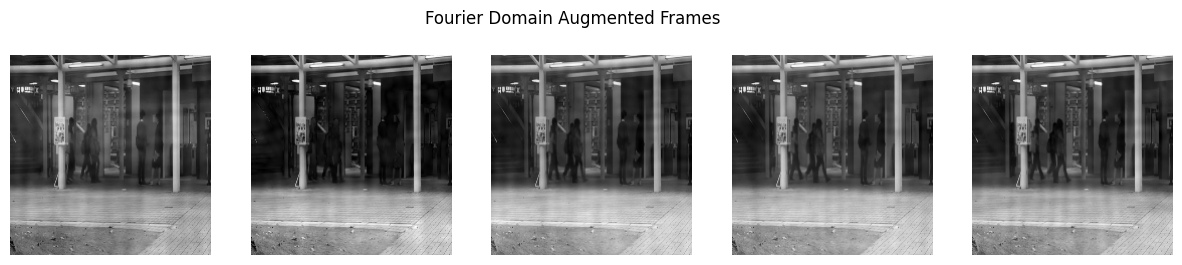

Displaying some training frames with simulated rain effect:


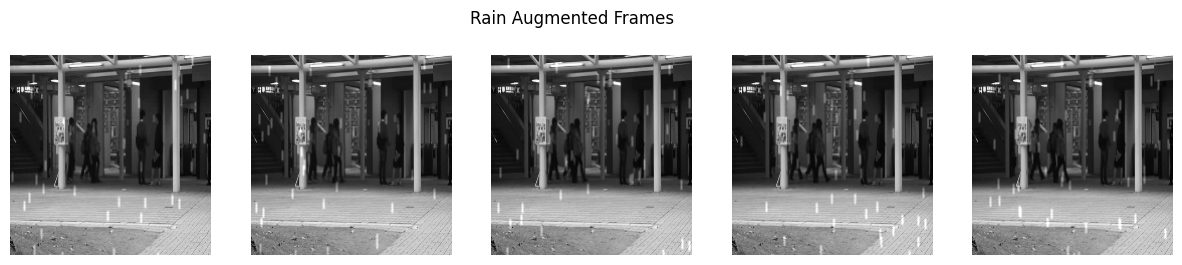

Displaying some training frames with simulated fog effect:


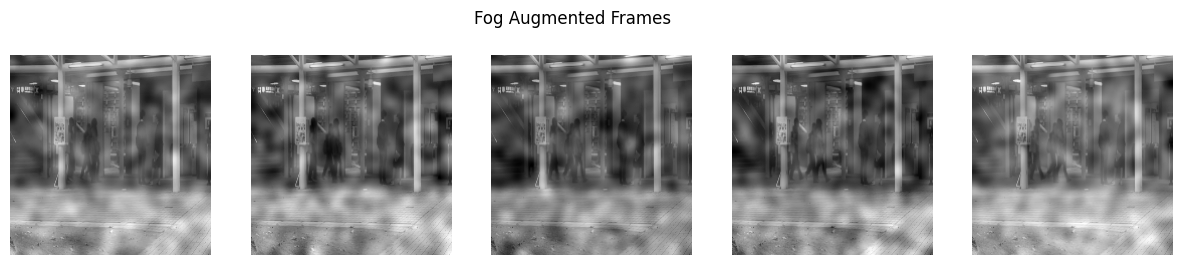

Displaying some training frames with simulated occlusion effect:


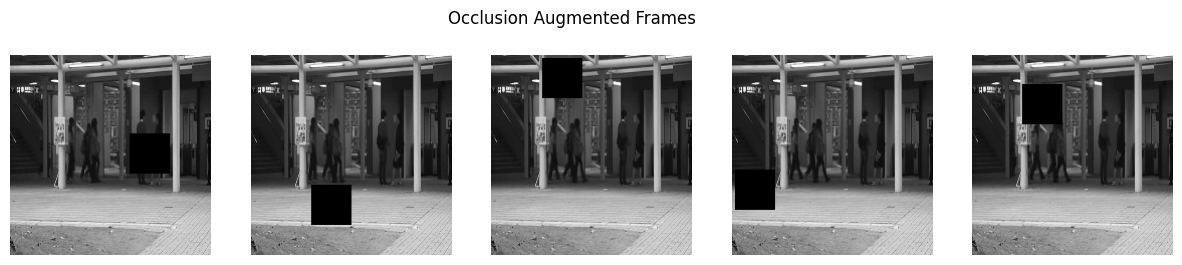

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 200, 200, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 200, 200, 3)    │              0 │ input_layer_2[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_2[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 58,637,344 (223.68 MB)

 Trainable params: 266,400 (1.02 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

120/120 ━━━━━━━━━━━━━━━━━━━━ 108s 845ms/step
Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - loss: 0.0331 - val_loss: 0.0251
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 96s 885ms/step - loss: 0.0075 - val_loss: 0.0192
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 876ms/step - loss: 0.0056 - val_loss: 0.0157
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 94s 875ms/step - loss: 0.0045 - val_loss: 0.0148
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 878ms/step - loss: 0.0038 - val_loss: 0.0130
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 876ms/step - loss: 0.0032 - val_loss: 0.0131
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 877ms/step - loss: 0.0030 - val_loss: 0.0110
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 878ms/step - loss: 0.0026 - val_loss: 0.0105
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 876ms/step - loss: 0.0024 - val_loss: 0.0090
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 878ms/step - loss: 0.0022 - val_loss: 0.0080
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 95s 877ms/step - loss: 0.

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, map_coordinates

# ------------------------------------------------------------------------------
# Elastic Deformations (Deformable Augmentation)
# ------------------------------------------------------------------------------
def elastic_transform(image, alpha, sigma, random_state=None):
    """
    Applies elastic deformation to an image.
    
    Parameters:
      image: 2D numpy array (grayscale image)
      alpha: Scaling factor that controls the intensity of the deformation.
      sigma: Standard deviation for the Gaussian filter (controls smoothness).
      random_state: (optional) NumPy RandomState for reproducibility.
    
    Returns:
      Elastically deformed image.
      
    Based on the method described by Simard et al. (2003).
    """
    if random_state is None:
        random_state = np.random.RandomState(None)
    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))
    distorted_image = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)
    return distorted_image

# ------------------------------------------------------------------------------
# Fourier Domain Adaptation (Frequency-Based Augmentation)
# ------------------------------------------------------------------------------
def fourier_domain_augmentation(image, beta=0.1):
    """
    Applies frequency-based augmentation using Fourier Domain Adaptation (FDA).
    This function perturbs the low-frequency amplitude components of the image.
    
    Parameters:
      image: 2D numpy array (grayscale image)
      beta: Controls the size of the low-frequency band (relative to image dimensions).
      
    Returns:
      Augmented image with modified low-frequency components.
      
    This technique leverages the Fourier transform ([NumPy FFT](https://numpy.org/doc/stable/reference/routines.fft.html))
    and is inspired by methods in domain adaptation (see [Fourier Domain Adaptation for Semantic Segmentation](https://openaccess.thecvf.com/content_CVPR_2021/html/Liu_Fourier_Domain_Adaptation_for_Semantic_Segmentation_CVPR_2021_paper.html)).
    """
    h, w = image.shape
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    
    amplitude = np.abs(fshift)
    phase = np.angle(fshift)
    
    # Determine the size of the low-frequency region
    b = int(beta * min(h, w))
    c_h, c_w = h // 2, w // 2
    
    # Augment the low-frequency amplitude by applying a random scaling factor
    amp_aug = amplitude.copy()
    random_factor = np.random.uniform(0.5, 1.5, size=(2*b, 2*b))
    amp_aug[c_h-b:c_h+b, c_w-b:c_w+b] *= random_factor
    
    # Reconstruct the FFT with augmented amplitude
    fshift_aug = amp_aug * np.exp(1j * phase)
    f_ishift = np.fft.ifftshift(fshift_aug)
    img_back = np.fft.ifft2(f_ishift)
    img_aug = np.abs(img_back)
    # Normalize the image to [0, 1]
    img_aug = (img_aug - img_aug.min()) / (img_aug.max() - img_aug.min() + 1e-8)
    return img_aug

# ------------------------------------------------------------------------------
# Simulated Environmental Effects (Rain, Fog, Occlusion)
# ------------------------------------------------------------------------------
def add_rain(image, rain_intensity=0.5, drop_length=10):
    """
    Simulates rain by adding white streaks to the image.
    """
    rain_layer = np.zeros_like(image)
    num_drops = int(rain_intensity * image.shape[0] * image.shape[1] / 500)
    for _ in range(num_drops):
        x = np.random.randint(0, image.shape[0])
        y = np.random.randint(0, image.shape[1])
        for l in range(drop_length):
            if x + l < image.shape[0]:
                rain_layer[x + l, y] = 1.0
    rain_layer = cv2.GaussianBlur(rain_layer, (3, 3), 0)
    return np.clip(image + rain_layer * 0.5, 0, 1)

def add_fog(image, fog_intensity=0.5):
    """
    Simulates fog by blending the image with a soft white mask.
    """
    h, w = image.shape
    fog = np.random.rand(h, w)
    fog = cv2.GaussianBlur(fog, (31, 31), 0)
    fog = (fog - fog.min()) / (fog.max() - fog.min())
    return np.clip(image * (1 - fog_intensity) + fog_intensity * fog, 0, 1)

def add_occlusion(image, occlusion_ratio=0.2):
    """
    Simulates occlusion by overlaying a black rectangle.
    """
    h, w = image.shape
    occ_h = int(h * occlusion_ratio)
    occ_w = int(w * occlusion_ratio)
    x = np.random.randint(0, h - occ_h)
    y = np.random.randint(0, w - occ_w)
    occluded = image.copy()
    occluded[x:x+occ_h, y:y+occ_w] = 0.0
    return occluded

def simulate_environmental_effects(image, effect_type="rain"):
    """
    Applies a simulated environmental effect to the image.
    effect_type can be "rain", "fog", or "occlusion".
    """
    if effect_type == "rain":
        return add_rain(image)
    elif effect_type == "fog":
        return add_fog(image)
    elif effect_type == "occlusion":
        return add_occlusion(image)
    else:
        return image

# ------------------------------------------------------------------------------
# Dataset Setup
# ------------------------------------------------------------------------------
DATASET_PATH = '/kaggle/input/avenue/avenue'
input_shape = (200, 200, 1)

# ------------------------------------------------------------------------------
# 1. Data Loading Functions
# ------------------------------------------------------------------------------
def load_train_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    Each subfolder (e.g. '01', '02', ...) is assumed to hold frames for one video.
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

def load_test_dataset(directory):
    """
    Loads images from the given directory (which should contain subfolders for each video).
    """
    X = []
    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in sorted(os.listdir(folder_path)):
                img_path = os.path.join(folder_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                            img = cv2.resize(img, (200, 200))
                            img = img.astype('float32') / 255.0
                            X.append(img)
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")
    X = np.array(X)
    return X.reshape(-1, 200, 200, 1)

# ------------------------------------------------------------------------------
# 2. Abnormal Frame Ranges (Manually Provided)
# ------------------------------------------------------------------------------
abnormal_frame_ranges = [
    range(78, 393),
    range(273, 725),
    range(295, 583),
    range(380, 650),
    range(469, 787),
    range(345, 857),
    range(423, 564),
    range(21, 31),
    range(136, 497),
    range(571, 638),
    range(21, 309),
    range(539, 646),
    range(259, 459),
    range(399, 486),
    range(498, 588),
    range(632, 731),
    range(21, 100),
    range(21, 286),
    range(109, 241),
    range(65, 169),
    range(14, 67),
]

def load_and_divide_test_dataset(directory, abnormal_frame_ranges):
    """
    Loads test images from subfolders and splits them into normal (label=0)
    and abnormal (label=1) frames based on pre-defined abnormal_frame_ranges.
    """
    normal_frames = []
    abnormal_frames = []
    normal_labels = []
    abnormal_labels = []
    folder_index = 0

    for folder in sorted(os.listdir(directory)):
        folder_path = os.path.join(directory, folder)
        if not os.path.isdir(folder_path):
            continue
        if folder_index >= len(abnormal_frame_ranges):
            print(f"Warning: More subfolders than abnormal_frame_ranges entries. Skipping '{folder}'")
            continue

        frame_range = abnormal_frame_ranges[folder_index]
        file_index = 1

        print(f"Processing folder: {folder}")
        print(f"Abnormal frame range: {frame_range}")

        for filename in sorted(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, filename)
            if not os.path.isfile(img_path):
                continue
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (200, 200))
                    img = img.astype('float32') / 255.0

                    if file_index in frame_range:
                        abnormal_frames.append(img)
                        abnormal_labels.append(1)
                    else:
                        normal_frames.append(img)
                        normal_labels.append(0)
                file_index += 1
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
        folder_index += 1

    normal_frames = np.array(normal_frames).reshape(-1, 200, 200, 1)
    abnormal_frames = np.array(abnormal_frames).reshape(-1, 200, 200, 1)
    normal_labels = np.zeros((len(normal_frames), 1))
    abnormal_labels = np.ones((len(abnormal_frames), 1))
    return normal_frames, abnormal_frames, normal_labels, abnormal_labels

# ------------------------------------------------------------------------------
# 3. Load the Training & Testing Data
# ------------------------------------------------------------------------------
# Update paths to point to the 'frames' subdirectory
train_path = os.path.join(DATASET_PATH, "training", "frames")
test_path  = os.path.join(DATASET_PATH, "testing", "frames")

try:
    avenue_xTrain = load_train_dataset(train_path)
    print("Shape of avenue_xTrain:", avenue_xTrain.shape)
    if avenue_xTrain.shape[0] == 0:
        raise ValueError("Training dataset is empty. Check directory: " + train_path)
except Exception as e:
    print(f"Error loading training dataset: {e}")
    raise

try:
    avenue_xTest = load_test_dataset(test_path)
    print("Shape of avenue_xTest:", avenue_xTest.shape)
except Exception as e:
    print(f"Error loading test dataset: {e}")
    raise

try:
    (avenue_xTest_normal,
     avenue_xTest_abnormal,
     avenue_yTest_normal,
     avenue_yTest_abnormal) = load_and_divide_test_dataset(test_path, abnormal_frame_ranges)
    print("Shape of avenue_xTest_normal:", avenue_xTest_normal.shape)
    print("Shape of avenue_xTest_abnormal:", avenue_xTest_abnormal.shape)
    print("Shape of avenue_yTest_normal:", avenue_yTest_normal.shape)
    print("Shape of avenue_yTest_abnormal:", avenue_yTest_abnormal.shape)
except Exception as e:
    print(f"Error loading/dividing test dataset: {e}")
    raise

# ------------------------------------------------------------------------------
# 4. Visualization Function
# ------------------------------------------------------------------------------
def plot_images(images, title, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(input_shape[:2]), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

print("Displaying some training frames:")
plot_images(avenue_xTrain, "Training Frames", n=5)
print("Displaying some testing frames:")
plot_images(avenue_xTest, "Testing Frames", n=5)

# ------------------------------------------------------------------------------
# Augmentation: Elastic Deformation on Training Data
# ------------------------------------------------------------------------------
elastic_images = []
num_samples = 5
for i in range(num_samples):
    img = avenue_xTrain[i].squeeze()  # Use the loaded training image
    deformed_img = elastic_transform(img, alpha=34, sigma=4)
    elastic_images.append(deformed_img.reshape(input_shape[:2]))

print("Displaying some Elastically Deformed training frames:")
plot_images(np.array(elastic_images).reshape(-1, 200, 200, 1), "Elastic Deformation Augmented Frames", n=5)

# ------------------------------------------------------------------------------
# Augmentation: Fourier Domain Augmentation on Training Data
# ------------------------------------------------------------------------------
fourier_images = []
for i in range(num_samples):
    img = avenue_xTrain[i].squeeze()  # Use the loaded training image
    fourier_img = fourier_domain_augmentation(img, beta=0.1)
    fourier_images.append(fourier_img.reshape(input_shape[:2]))

print("Displaying some Fourier Domain Augmented training frames:")
plot_images(np.array(fourier_images).reshape(-1, 200, 200, 1), "Fourier Domain Augmented Frames", n=5)

# ------------------------------------------------------------------------------
# Augmentation: Simulated Environmental Effects on Training Data
# ------------------------------------------------------------------------------
env_effects = ["rain", "fog", "occlusion"]
for effect in env_effects:
    augmented_env = []
    for i in range(num_samples):
        img = avenue_xTrain[i].squeeze()  # Use the loaded training image
        aug_img = simulate_environmental_effects(img, effect_type=effect)
        augmented_env.append(aug_img.reshape(input_shape[:2]))
    print(f"Displaying some training frames with simulated {effect} effect:")
    plot_images(np.array(augmented_env).reshape(-1, 200, 200, 1), f"{effect.capitalize()} Augmented Frames", n=5)

# ------------------------------------------------------------------------------
# 5. ResNet152-based Model for Deep SVDD
# ------------------------------------------------------------------------------
def create_resnet_model(input_shape):
    """
    Creates a ResNet152-based model for Deep SVDD.
    The model expects grayscale images (200,200,1), replicates the single channel to 3 channels,
    passes them through ResNet152 (with pretrained ImageNet weights), and then adds dense layers to yield
    a 32-dimensional latent representation.
    """
    base_input = layers.Input(shape=input_shape)  # (200,200,1)
    
    # Replicate the grayscale channel to form a 3-channel image.
    x = layers.Concatenate()([base_input, base_input, base_input])  # now (200,200,3)
    
    # Load ResNet152 without the top layers, using pretrained weights.
    base_model = tf.keras.applications.ResNet152(
        include_top=False,
        weights='imagenet',
        input_tensor=x
    )
    
    # Freeze ResNet152 layers (optional)
    for layer in base_model.layers:
        layer.trainable = False
    
    # Global Average Pooling to reduce spatial dimensions.
    x = layers.GlobalAveragePooling2D()(base_model.output)
    
    # A dense layer for additional abstraction.
    x = layers.Dense(128, activation='relu')(x)
    
    # Final output layer for the latent representation (32 dimensions).
    outputs = layers.Dense(32, activation=None)(x)
    
    model = models.Model(inputs=base_input, outputs=outputs)
    return model

model = create_resnet_model(input_shape)
model.summary()

# ------------------------------------------------------------------------------
# 6. Compute Center c in the Latent Space (Deep SVDD)
# ------------------------------------------------------------------------------
train_features = model.predict(avenue_xTrain, batch_size=128)
c = np.mean(train_features, axis=0)
c[np.abs(c) < 1e-6] = 1e-6  # Avoid near-zero values
c_tf = tf.constant(c, dtype=tf.float32)

# ------------------------------------------------------------------------------
# 7. Deep SVDD Loss Function
# ------------------------------------------------------------------------------
def deep_svdd_loss(y_true, y_pred):
    return tf.reduce_mean(tf.reduce_sum(tf.square(y_pred - c_tf), axis=1))

dummy_labels = np.zeros((avenue_xTrain.shape[0], 1))
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss=deep_svdd_loss)

if avenue_xTrain.shape[0] < 128:
    print("Warning: Training dataset size is smaller than the batch size.")

# Train for 50 epochs (or adjust as needed)
model.fit(avenue_xTrain, dummy_labels, epochs=50, batch_size=128, validation_split=0.1)

# ------------------------------------------------------------------------------
# 8. Compute Anomaly Scores on Test Data
# ------------------------------------------------------------------------------
def compute_anomaly_scores(model, data, center):
    features = model.predict(data, batch_size=128)
    scores = np.sum((features - center)**2, axis=1)
    return scores

test_scores = compute_anomaly_scores(model, avenue_xTest, c)
print("Mean anomaly score (entire test set):", np.mean(test_scores))

normal_scores = compute_anomaly_scores(model, avenue_xTest_normal, c)
abnormal_scores = compute_anomaly_scores(model, avenue_xTest_abnormal, c)
print("Mean anomaly score (normal frames):", np.mean(normal_scores))
print("Mean anomaly score (abnormal frames):", np.mean(abnormal_scores))

# ------------------------------------------------------------------------------
# 9. Evaluation: F1 Score and Precision-Recall AUC
# ------------------------------------------------------------------------------
y_true = np.concatenate([avenue_yTest_normal, avenue_yTest_abnormal]).ravel()
y_scores = np.concatenate([normal_scores, abnormal_scores])

precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
max_f1 = np.max(f1_scores)
optimal_idx = np.argmax(f1_scores) if thresholds.size > 0 else None
optimal_threshold = thresholds[optimal_idx] if optimal_idx is not None else None

print("Maximum F1 Score: {:.4f}".format(max_f1))
print("Optimal threshold for classification: {:.4f}".format(optimal_threshold))

y_pred = (y_scores >= optimal_threshold).astype(int) if optimal_threshold is not None else np.zeros_like(y_true)
f1_val = f1_score(y_true, y_pred)
print("F1 Score at optimal threshold: {:.4f}".format(f1_val))

pr_auc = average_precision_score(y_true, y_scores)
print("Precision-Recall AUC (Average Precision): {:.4f}".format(pr_auc))
